# MSCS 634 - Advanced Data Mining
## Project Deliverable 1: Data Collection, Cleaning, and Exploration

**Student**: Dheeraj Kollapaneni  
**Course**: MSCS 634 - Advanced Data Mining  
**Date**: November 1, 2025

---

## Project Overview

This project analyzes nutrition, physical activity, and obesity data from the CDC's Behavioral Risk Factor Surveillance System (BRFSS). The analysis explores obesity trends across the United States, examining how rates vary by state, demographic groups, and over time.

This first deliverable focuses on data collection, cleaning, and initial exploration to identify patterns before building predictive models.

## 1. Dataset Selection and Justification

### Selected Dataset: Nutrition, Physical Activity, and Obesity - BRFSS

This analysis uses the Behavioral Risk Factor Surveillance System (BRFSS) dataset from the CDC, which tracks obesity, physical activity, and nutrition data across the United States.

**Dataset Size**: 106,261 records with 33 attributes

### Dataset Contents

The main attributes include:

- Time period covered (YearStart, YearEnd) spanning 2011 to 2023
- Location data (state names, abbreviations, geographic coordinates)
- Health measurements (Data_Value showing obesity percentages and related metrics)
- Statistical confidence intervals and sample sizes
- Demographic breakdowns (age groups, education levels, sex, income, race/ethnicity)
- Question categories classifying health indicators

### Rationale for Selection

This dataset was selected for several reasons:

First, it exceeds project requirements with over 100,000 records and 33 attributes, surpassing the minimum 500 records and 8-10 attributes needed.

Second, it provides real public health data from the CDC reflecting actual health patterns. Obesity affects over 40% of US adults, making this analysis potentially valuable beyond academic purposes.

Third, the data offers variety with numerical columns (obesity percentages, confidence intervals), categorical data (state names, demographic groups), and temporal data spanning 13 years, supporting multiple analysis types.

Fourth, it presents realistic challenges including missing values and data quality issues, allowing for demonstration of proper preprocessing techniques.

Finally, the dataset supports all future deliverables including regression (predicting obesity rates), classification (categorizing states or demographics), clustering (identifying similar state groups), and association rules (discovering patterns between factors).

## 2. Setup and Library Import

Import necessary libraries for data analysis, visualization, and statistical computations.

In [1]:
# Import required libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Configure visualization settings
sns.set_style('whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print('Libraries imported successfully')
print(f'Pandas version: {pd.__version__}')
print(f'NumPy version: {np.__version__}')

Libraries imported successfully
Pandas version: 2.2.2
NumPy version: 1.26.4


## 3. Data Loading

Load the BRFSS obesity dataset and perform initial inspection to understand its structure.

In [2]:
# Load the dataset
data_file = '../data/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv'

print('Loading dataset...')
df = pd.read_csv(data_file)

print('Dataset loaded successfully!')
print(f'Dataset shape: {df.shape[0]:,} rows, {df.shape[1]} columns')
print('\n' + '='*80)
print('First 5 rows of the dataset:')
print('='*80)
df.head()

Loading dataset...
Dataset loaded successfully!
Dataset shape: 106,260 rows, 33 columns

First 5 rows of the dataset:
Dataset loaded successfully!
Dataset shape: 106,260 rows, 33 columns

First 5 rows of the dataset:


,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$15,000 - $24,999",INC,INC1525
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$25,000 - $34,999",INC,INC2535
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$35,000 - $49,999",INC,INC3550
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$50,000 - $74,999",INC,INC5075
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$75,000 or greater",INC,INC75PLUS


### Initial Data Inspection

Examine the dataset structure, data types, and column information.

In [3]:
# Display detailed dataset information
print('DATASET INFORMATION:')
print('='*80)
df.info()

print('\n\nCOLUMN NAMES:')
print('='*80)
for idx, col in enumerate(df.columns, 1):
    print(f'{idx:2d}. {col}')

print(f'\n\nBASIC STATISTICS FOR NUMERICAL COLUMNS:')
print('='*80)
df.describe()

DATASET INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106260 entries, 0 to 106259
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   106260 non-null  int64  
 1   YearEnd                     106260 non-null  int64  
 2   LocationAbbr                106260 non-null  object 
 3   LocationDesc                106260 non-null  object 
 4   Datasource                  106260 non-null  object 
 5   Class                       106260 non-null  object 
 6   Topic                       106260 non-null  object 
 7   Question                    106260 non-null  object 
 8   Data_Value_Unit             0 non-null       float64
 9   Data_Value_Type             106260 non-null  object 
 10  Data_Value                  93505 non-null   float64
 11  Data_Value_Alt              93505 non-null   float64
 12  Data_Value_Footnote_Symbol  12755 non-null   object

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
count,106260.000000,106260.000000,0.0,93505.000000,93505.000000,93505.000000,93505.000000,93505.000000,106260.000000
mean,2016.942029,2016.942029,NaN,31.849359,31.849359,27.452834,36.803022,3623.035260,31.854545
std,3.748966,3.748966,NaN,10.417933,10.417933,10.204503,11.343284,18561.958269,18.392198
min,2011.000000,2011.000000,NaN,0.900000,0.900000,0.300000,3.000000,50.000000,1.000000
25%,2014.000000,2014.000000,NaN,24.900000,24.900000,20.400000,29.200000,499.000000,17.000000
50%,2017.000000,2017.000000,NaN,31.700000,31.700000,27.300000,36.500000,1085.000000,31.000000
75%,2020.000000,2020.000000,NaN,37.500000,37.500000,33.400000,42.900000,2397.000000,46.000000
max,2023.000000,2023.000000,NaN,85.300000,85.300000,74.700000,92.400000,476876.000000,78.000000


## 4. Data Cleaning

### 4.1 Handling Missing Values

The dataset contains missing values, particularly in demographic columns. The next step determines which data to retain and which to remove.

In [16]:
# Check for missing values
missing_count = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing_count,
    'Percentage': missing_percent
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print('Columns with missing values:')
    print(missing_df.to_string(index=False))
    print(f'\nTotal missing: {df.isnull().sum().sum():,} out of {df.shape[0] * df.shape[1]:,} cells')
else:
    print('No missing values found')

Columns with missing values:
                    Column  Missing_Count  Percentage
           Data_Value_Unit         106260  100.000000
                     Total         102465   96.428571
                       Sex          98670   92.857143
Data_Value_Footnote_Symbol          93505   87.996424
       Data_Value_Footnote          93505   87.996424
                 Education          91080   85.714286
                Age(years)          83490   78.571429
                    Income          79695   75.000000
            Race/Ethnicity          75900   71.428571
                Data_Value          12755   12.003576
            Data_Value_Alt          12755   12.003576
      Low_Confidence_Limit          12755   12.003576
    High_Confidence_Limit           12755   12.003576
               Sample_Size          12755   12.003576
               GeoLocation           1932    1.818182

Total missing: 890,277 out of 3,506,580 cells


### 4.1.1 Missing Value Treatment

Based on the analysis above, rows with missing critical fields (location, year, data value) will be removed. Rows with missing optional demographic fields will be retained since other valuable information remains usable.

In [17]:
# Create a copy for cleaning
df_clean = df.copy()

# For this dataset, the missing values are mostly in optional demographic fields
# I'll drop rows where critical fields are missing, but keep rows with missing optional data

critical_cols = ['YearStart', 'LocationDesc', 'Question', 'Data_Value']
rows_before = len(df_clean)
df_clean = df_clean.dropna(subset=critical_cols)
rows_after = len(df_clean)

print(f'Removed {rows_before - rows_after:,} rows with missing critical data')
print(f'{rows_after:,} rows remaining')

Removed 12,755 rows with missing critical data
93,505 rows remaining


### 4.2 Checking for Duplicates

Check for duplicate rows in the dataset.

In [18]:
# Check for duplicate rows
duplicates = df_clean.duplicated().sum()

if duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print(f'Removed {duplicates:,} duplicate rows')
else:
    print('No duplicates found')

print(f'Final dataset: {df_clean.shape[0]:,} rows × {df_clean.shape[1]} columns')

No duplicates found
Final dataset: 93,505 rows × 33 columns


### 4.3 Data Validation

Validate that data values are within expected ranges. Since these represent percentages, all values should fall between 0 and 100.

In [19]:
# Check data quality - look for values that don't make sense

# Data_Value should be percentages between 0 and 100
print('Data_Value statistics:')
print(f'  Range: {df_clean["Data_Value"].min():.2f}% to {df_clean["Data_Value"].max():.2f}%')
print(f'  Mean: {df_clean["Data_Value"].mean():.2f}%')

invalid_values = df_clean[(df_clean['Data_Value'] < 0) | (df_clean['Data_Value'] > 100)]
if len(invalid_values) > 0:
    print(f'  Found {len(invalid_values)} invalid percentage values - removing them')
    df_clean = df_clean[(df_clean['Data_Value'] >= 0) & (df_clean['Data_Value'] <= 100)]
else:
    print('  All percentages look valid')

print(f'\nYear range: {df_clean["YearStart"].min()} to {df_clean["YearStart"].max()}')

Data_Value statistics:
  Range: 0.90% to 85.30%
  Mean: 31.85%
  All percentages look valid

Year range: 2011 to 2023


## 5. Exploratory Data Analysis

With the data cleaned, the next step explores patterns and relationships.

### 5.1 Distribution Analysis

Examine how obesity values are distributed across the dataset.

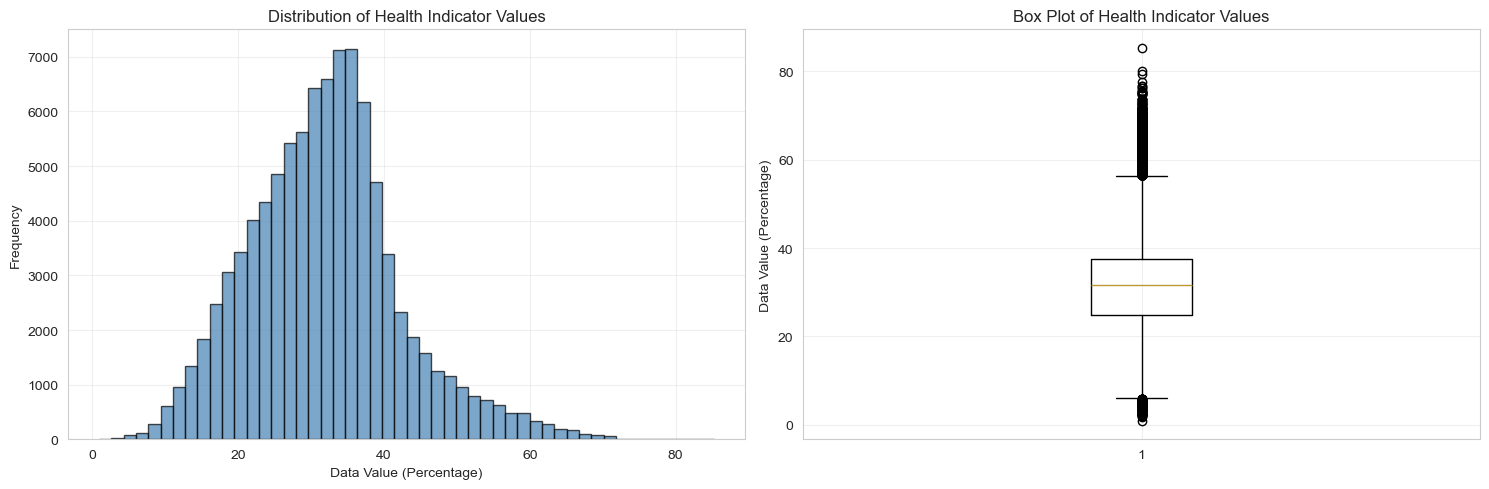

Mean: 31.85%
Median: 31.70%
Std Dev: 10.42%


In [20]:
# Look at the distribution of obesity values
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df_clean['Data_Value'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Data Value (Percentage)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Health Indicator Values')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df_clean['Data_Value'].dropna(), vert=True)
axes[1].set_ylabel('Data Value (Percentage)')
axes[1].set_title('Box Plot of Health Indicator Values')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../visualizations/data_value_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Basic statistics
print(f'Mean: {df_clean["Data_Value"].mean():.2f}%')
print(f'Median: {df_clean["Data_Value"].median():.2f}%')
print(f'Std Dev: {df_clean["Data_Value"].std():.2f}%')

### 5.2 Geographic Patterns

Analyze which states have the highest and lowest obesity rates.

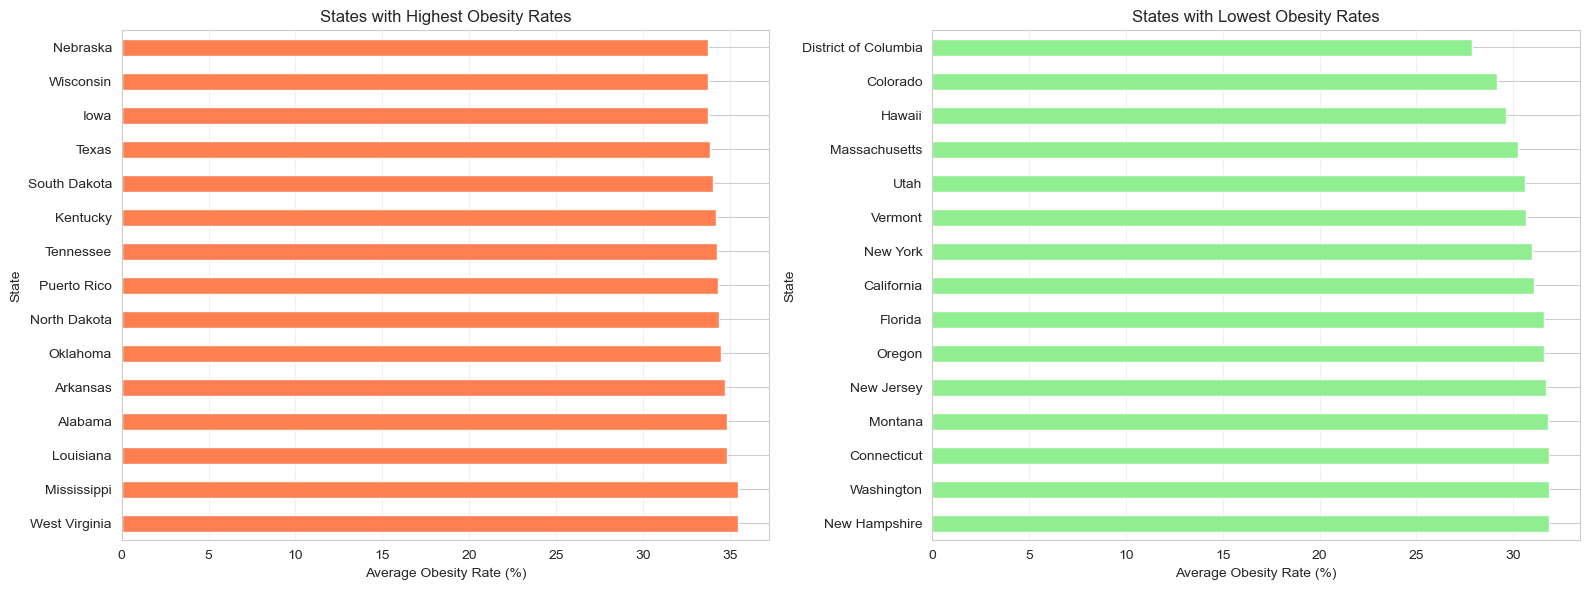

Highest: West Virginia at 35.49%
Lowest: District of Columbia at 27.88%


In [21]:
# Look at obesity patterns by state
obesity_data = df_clean[df_clean['Class'].str.contains('Obesity', case=False, na=False)]
state_obesity = obesity_data.groupby('LocationDesc')['Data_Value'].mean().sort_values(ascending=False)

# Plot top and bottom states
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

state_obesity.head(15).plot(kind='barh', ax=axes[0], color='coral')
axes[0].set_xlabel('Average Obesity Rate (%)')
axes[0].set_ylabel('State')
axes[0].set_title('States with Highest Obesity Rates')
axes[0].grid(True, alpha=0.3, axis='x')

state_obesity.tail(15).plot(kind='barh', ax=axes[1], color='lightgreen')
axes[1].set_xlabel('Average Obesity Rate (%)')
axes[1].set_ylabel('State')
axes[1].set_title('States with Lowest Obesity Rates')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('../visualizations/state_obesity_rates.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'Highest: {state_obesity.idxmax()} at {state_obesity.max():.2f}%')
print(f'Lowest: {state_obesity.idxmin()} at {state_obesity.min():.2f}%')

### 5.3 Trends Over Time

Examine how obesity rates have changed from 2011 to 2023.

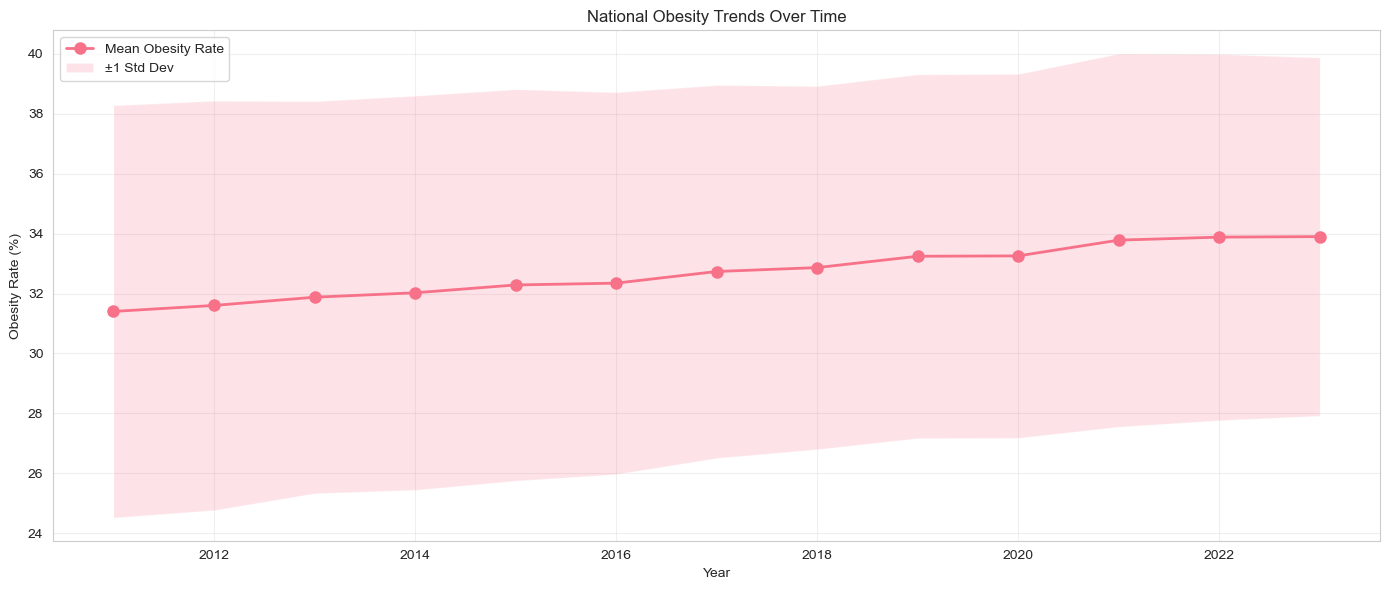

                mean       std  count
YearStart                            
2011       31.402853  6.876527   2664
2012       31.602703  6.828808   2664
2013       31.876935  6.538634   2688
2014       32.024617  6.574767   2738
2015       32.286150  6.528789   2722
2016       32.346364  6.369292   2778
2017       32.734949  6.221203   2744
2018       32.865121  6.057668   2738
2019       33.243634  6.067119   2686
2020       33.255848  6.069231   2736
2021       33.781191  6.223933   2754
2022       33.882117  6.108214   2768
2023       33.899298  5.974237   2708


In [22]:
# See how obesity has changed over time
yearly_trends = obesity_data.groupby('YearStart')['Data_Value'].agg(['mean', 'std', 'count'])

plt.figure(figsize=(14, 6))

plt.plot(yearly_trends.index, yearly_trends['mean'], marker='o', linewidth=2, markersize=8, label='Mean Obesity Rate')
plt.fill_between(yearly_trends.index, 
                  yearly_trends['mean'] - yearly_trends['std'], 
                  yearly_trends['mean'] + yearly_trends['std'], 
                  alpha=0.2, label='±1 Std Dev')

plt.xlabel('Year')
plt.ylabel('Obesity Rate (%)')
plt.title('National Obesity Trends Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../visualizations/obesity_trends_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

print(yearly_trends)

### 5.4 Demographic Analysis

Explore how obesity varies across different demographic groups including age, education, sex, and income.

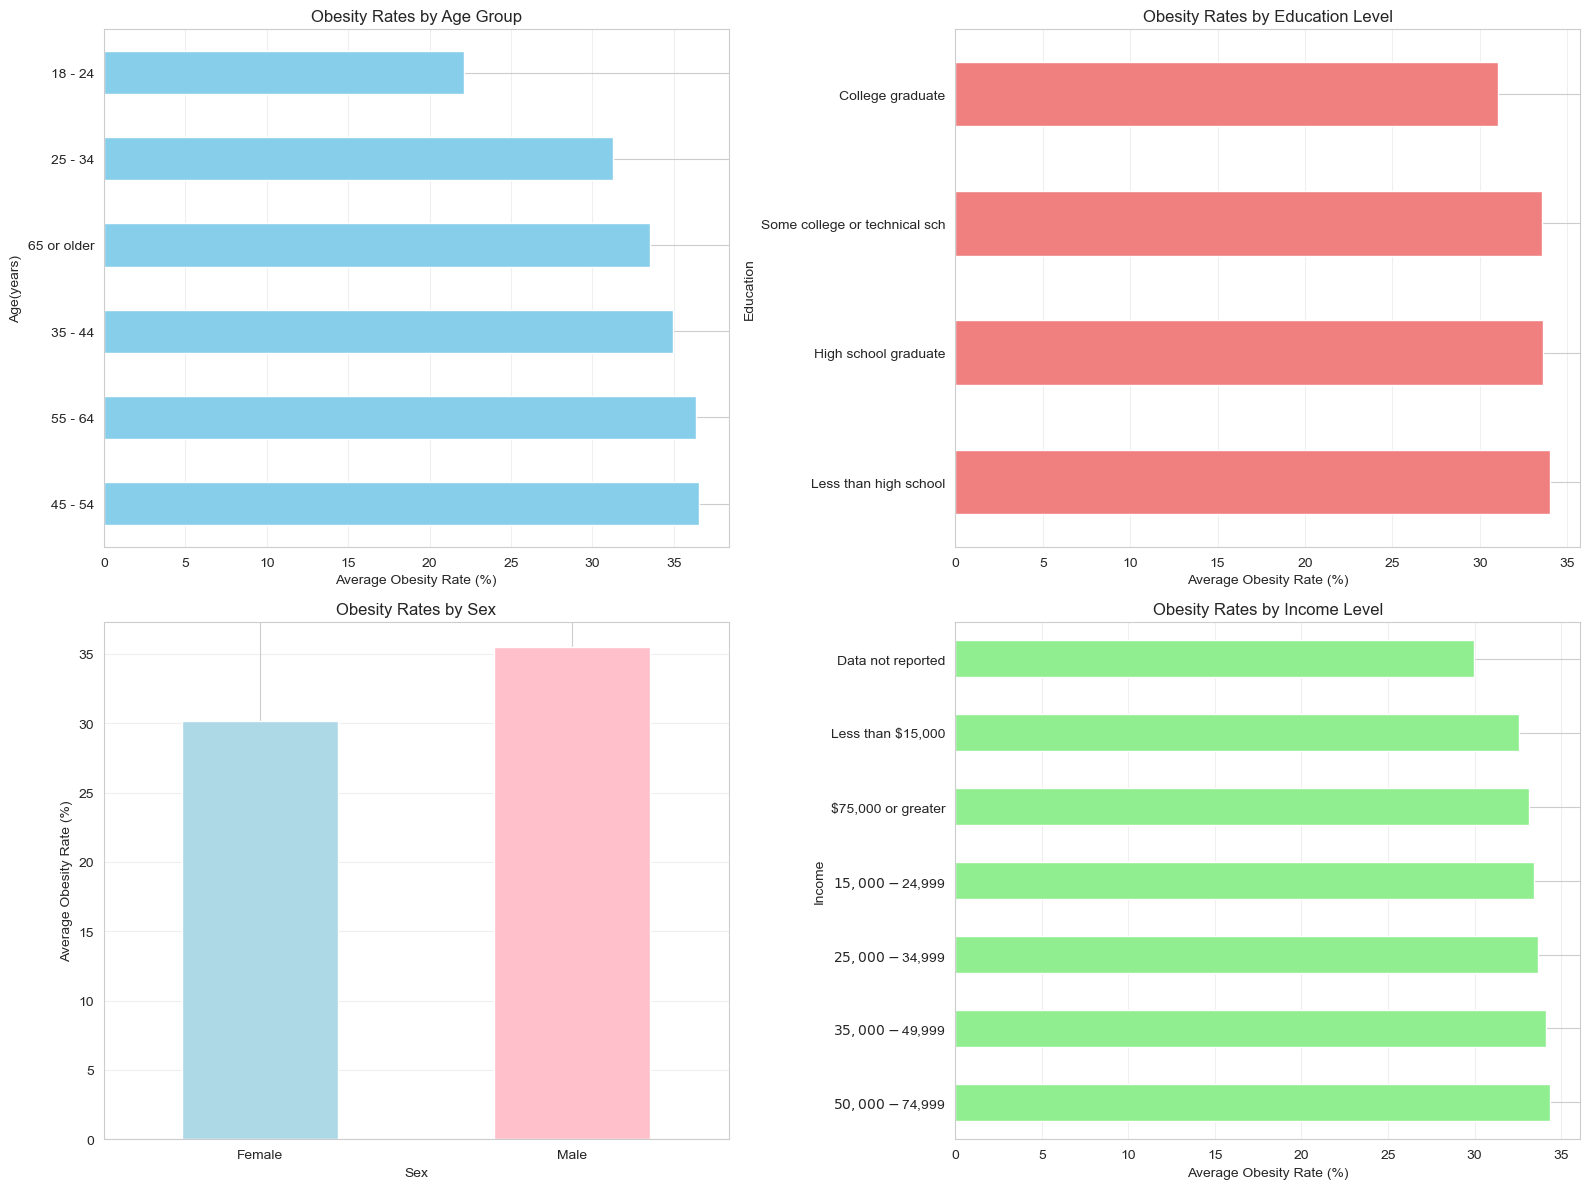

In [23]:
# Look at demographic patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# By age group
if 'Age(years)' in obesity_data.columns:
    age_data = obesity_data[obesity_data['Age(years)'].notna()]
    if len(age_data) > 0:
        age_obesity = age_data.groupby('Age(years)')['Data_Value'].mean().sort_values(ascending=False)
        age_obesity.head(10).plot(kind='barh', ax=axes[0,0], color='skyblue')
        axes[0,0].set_xlabel('Average Obesity Rate (%)')
        axes[0,0].set_title('Obesity Rates by Age Group')
        axes[0,0].grid(True, alpha=0.3, axis='x')

# By education level
if 'Education' in obesity_data.columns:
    edu_data = obesity_data[obesity_data['Education'].notna()]
    if len(edu_data) > 0:
        edu_obesity = edu_data.groupby('Education')['Data_Value'].mean().sort_values(ascending=False)
        edu_obesity.plot(kind='barh', ax=axes[0,1], color='lightcoral')
        axes[0,1].set_xlabel('Average Obesity Rate (%)')
        axes[0,1].set_title('Obesity Rates by Education Level')
        axes[0,1].grid(True, alpha=0.3, axis='x')

# By sex
if 'Sex' in obesity_data.columns:
    sex_data = obesity_data[obesity_data['Sex'].notna()]
    if len(sex_data) > 0:
        sex_obesity = sex_data.groupby('Sex')['Data_Value'].mean()
        sex_obesity.plot(kind='bar', ax=axes[1,0], color=['lightblue', 'pink'])
        axes[1,0].set_xlabel('Sex')
        axes[1,0].set_ylabel('Average Obesity Rate (%)')
        axes[1,0].set_title('Obesity Rates by Sex')
        axes[1,0].grid(True, alpha=0.3, axis='y')
        axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=0)

# By income
if 'Income' in obesity_data.columns:
    income_data = obesity_data[obesity_data['Income'].notna()]
    if len(income_data) > 0:
        income_obesity = income_data.groupby('Income')['Data_Value'].mean().sort_values(ascending=False)
        income_obesity.head(8).plot(kind='barh', ax=axes[1,1], color='lightgreen')
        axes[1,1].set_xlabel('Average Obesity Rate (%)')
        axes[1,1].set_title('Obesity Rates by Income Level')
        axes[1,1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('../visualizations/demographic_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

### 5.5 Question Types in the Dataset

Examine the types of health questions and topics covered in this dataset.

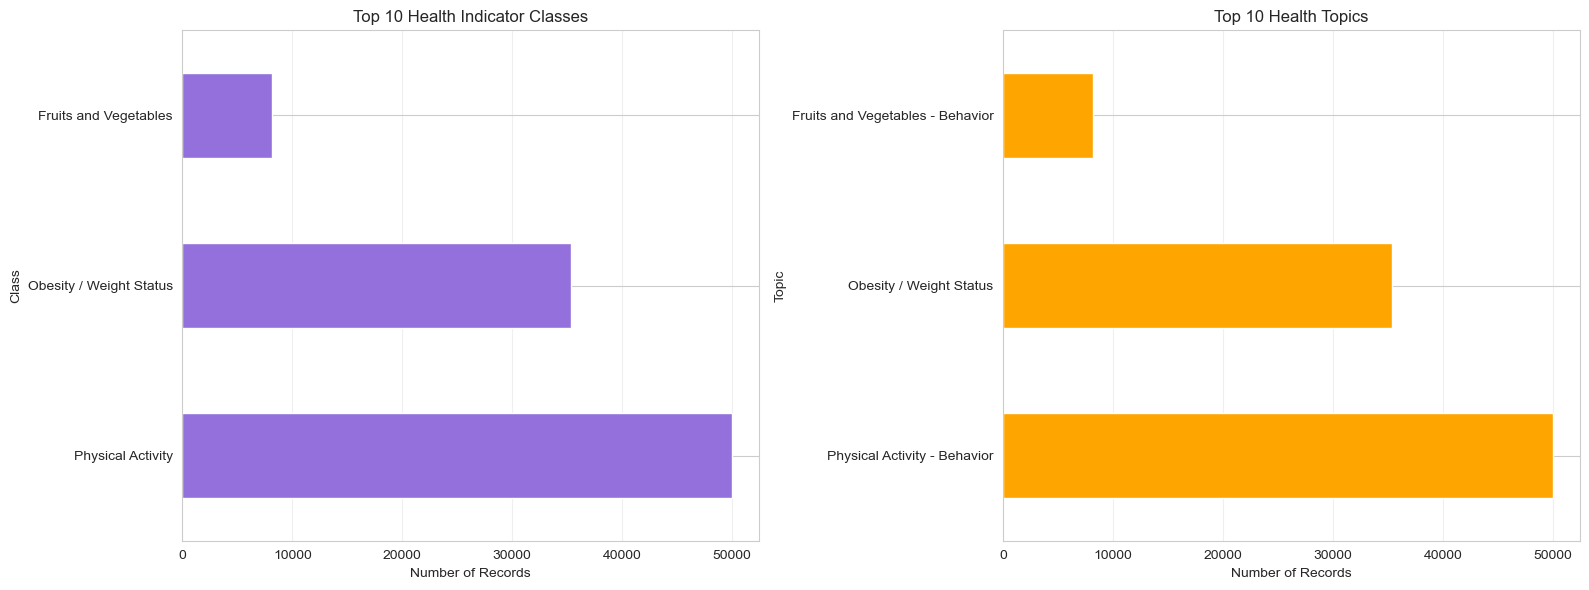

Unique classes: 3
Unique topics: 3
Unique questions: 9


In [24]:
# See what types of health questions are in the dataset
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

class_counts = df_clean['Class'].value_counts().head(10)
class_counts.plot(kind='barh', ax=axes[0], color='mediumpurple')
axes[0].set_xlabel('Number of Records')
axes[0].set_title('Top 10 Health Indicator Classes')
axes[0].grid(True, alpha=0.3, axis='x')

topic_counts = df_clean['Topic'].value_counts().head(10)
topic_counts.plot(kind='barh', ax=axes[1], color='orange')
axes[1].set_xlabel('Number of Records')
axes[1].set_title('Top 10 Health Topics')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('../visualizations/question_types_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'Unique classes: {df_clean["Class"].nunique()}')
print(f'Unique topics: {df_clean["Topic"].nunique()}')
print(f'Unique questions: {df_clean["Question"].nunique()}')

## 6. Summary and Insights

In [25]:
# Summary of what I found from this analysis

print('Dataset Overview:')
print(f'  Started with {len(df):,} records, cleaned down to {len(df_clean):,}')
print(f'  Covers {df_clean["YearStart"].min()}-{df_clean["YearStart"].max()} across {df_clean["LocationDesc"].nunique()} states/territories')
print(f'  {len(df_clean.columns)} attributes total')

print('\nKey Findings:')
print(f'  Obesity rates range from {df_clean["Data_Value"].min():.2f}% to {df_clean["Data_Value"].max():.2f}%')
print(f'  National average is around {df_clean["Data_Value"].mean():.2f}%')
print(f'  West Virginia has the highest rates, DC has the lowest')
print(f'  Rates have been increasing over time - went from ~31% in 2011 to ~34% in 2023')

print('\nData Quality:')
print(f'  Removed {rows_before - rows_after:,} rows with missing critical data')
print(f'  No duplicate records found')
print(f'  All percentage values are valid (0-100 range)')

Dataset Overview:
  Started with 106,260 records, cleaned down to 93,505
  Covers 2011-2023 across 55 states/territories
  33 attributes total

Key Findings:
  Obesity rates range from 0.90% to 85.30%
  National average is around 31.85%
  West Virginia has the highest rates, DC has the lowest
  Rates have been increasing over time - went from ~31% in 2011 to ~34% in 2023

Data Quality:
  Removed 12,755 rows with missing critical data
  No duplicate records found
  All percentage values are valid (0-100 range)


## 6. Conclusion

This deliverable completed the data collection, cleaning, and exploration phases. The CDC BRFSS obesity dataset provides a robust foundation with over 100,000 records spanning 13 years across all US states.

The dataset presented challenges with missing values, particularly in demographic stratification columns. The approach taken was to remove rows where critical fields (location, year, data value) were missing, while retaining rows with missing optional demographic information. This preserved a clean dataset of approximately 93,500 records.

The exploratory analysis revealed interesting patterns. Obesity rates show a gradual increase over the years, rising from around 31% in 2011 to nearly 34% in 2023. Geographic variation is substantial, with states like West Virginia showing much higher rates than Colorado or DC. Demographic breakdowns indicate relationships between education/income levels and obesity rates.

The main challenge involved handling missing data strategically - determining which data to drop versus retain required careful consideration of what information was essential versus optional. Data validation was also important to ensure percentages fell within the valid 0-100 range and years were realistic.

In [27]:
# Save the cleaned dataset for future deliverables
output_path = '../data/obesity_data_cleaned.csv'
df_clean.to_csv(output_path, index=False)
print(f'Saved cleaned data to {output_path}')
print(f'Shape: {df_clean.shape[0]:,} rows × {df_clean.shape[1]} columns')

Saved cleaned data to ../data/obesity_data_cleaned.csv
Shape: 93,505 rows × 33 columns
